In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
path = 'Data_Features/'
folder = 'auto_1'
sensor_types = ['Accelerometer', 'Gyroscope', 'Linear Accelerometer']

In [3]:
def load_sensor_data(path, folder, sensor_type):
    """Load the data for a given sensor type."""
    sensor_data = {}
    base_path = f'{path}{folder}/'
    sensor_data['pca'] = pd.read_csv(f'{base_path}{sensor_type}_pca.csv')
    sensor_data['pca_time'] = pd.read_csv(f'{base_path}{sensor_type}_pca_time.csv')
    sensor_data['pca_time_freq'] = pd.read_csv(f'{base_path}{sensor_type}_pca_time_freq.csv')
    return sensor_data

In [4]:
mode  = folder.split('_')[0]

# Create a dictionary to hold all the data
all_sensor_data = {}

# Loop through each sensor type and load the data
for sensor_type in sensor_types:
    all_sensor_data[sensor_type] = load_sensor_data(path, folder, sensor_type)

# Access the data for each sensor type
df_acc_pca = all_sensor_data['Accelerometer']['pca']
df_acc_pca_time = all_sensor_data['Accelerometer']['pca_time']
df_acc_pca_time_freq = all_sensor_data['Accelerometer']['pca_time_freq']

df_gyro_pca = all_sensor_data['Gyroscope']['pca']
df_gyro_pca_time = all_sensor_data['Gyroscope']['pca_time']
df_gyro_pca_time_freq = all_sensor_data['Gyroscope']['pca_time_freq']

df_lin_acc_pca = all_sensor_data['Linear Accelerometer']['pca']
df_lin_acc_pca_time = all_sensor_data['Linear Accelerometer']['pca_time']
df_lin_acc_pca_time_freq = all_sensor_data['Linear Accelerometer']['pca_time_freq']

pca_columns = df_lin_acc_pca_time_freq.filter(regex='^pca\d+$').columns

In [5]:
df_lin_acc_pca_time_freq

,Time (s),X,Y,Z,pca1,pca2,pca3,temp_X_mean,temp_X_std,temp_X_median,...,X_spectral_energy,X_spectral_entropy,Y_fft,Y_dominant_freq,Y_spectral_energy,Y_spectral_entropy,Z_fft,Z_dominant_freq,Z_spectral_energy,Z_spectral_entropy
0,10.247826,-0.007027,0.010127,0.004482,0.059783,0.163531,-0.024303,NaN,NaN,NaN,...,4.776503e+06,-214619.237792,243.004639,0,2.408212e+06,-140361.181618,31.321265,772,186029.867309,-35625.379464
1,10.749063,0.000415,0.015643,0.005915,0.067140,0.169246,-0.023269,NaN,NaN,NaN,...,4.776503e+06,-214619.237792,87.362427,0,2.408212e+06,-140361.181618,26.334736,772,186029.867309,-35625.379464
2,11.250301,0.008570,0.063228,-0.020871,0.073942,0.215601,-0.052480,NaN,NaN,NaN,...,4.776503e+06,-214619.237792,41.092577,0,2.408212e+06,-140361.181618,13.071928,772,186029.867309,-35625.379464
3,11.751541,0.109061,0.475696,0.093381,0.168371,0.634951,0.039775,NaN,NaN,NaN,...,4.776503e+06,-214619.237792,12.043904,0,2.408212e+06,-140361.181618,4.640165,772,186029.867309,-35625.379464
4,12.252781,0.650630,1.088782,0.073953,0.697701,1.256174,-0.018890,NaN,NaN,NaN,...,4.776503e+06,-214619.237792,24.495778,0,2.408212e+06,-140361.181618,2.748252,772,186029.867309,-35625.379464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,800.752659,-0.589263,0.086116,-0.137062,-0.526045,0.221796,-0.159277,-0.489495,0.241522,-0.456059,...,4.776503e+06,-214619.237792,46.823843,0,2.408212e+06,-140361.181618,4.395689,772,186029.867309,-35625.379464
1582,801.254139,-1.391868,0.327588,0.169513,-1.327993,0.463258,0.149018,-0.623111,0.328728,-0.509354,...,4.776503e+06,-214619.237792,24.495778,0,2.408212e+06,-140361.181618,2.748252,772,186029.867309,-35625.379464
1583,801.750604,-0.628265,0.525852,-0.200156,-0.574495,0.657117,-0.243044,-0.637300,0.325214,-0.560795,...,4.776503e+06,-214619.237792,12.043904,0,2.408212e+06,-140361.181618,4.640165,772,186029.867309,-35625.379464
1584,802.247069,-0.025505,0.403283,0.215823,0.037244,0.566177,0.167913,-0.586617,0.378516,-0.507501,...,4.776503e+06,-214619.237792,41.092577,0,2.408212e+06,-140361.181618,13.071928,772,186029.867309,-35625.379464


In [6]:
df_lin_acc_pca_time_freq.describe()

,Time (s),X,Y,Z,pca1,pca2,pca3,temp_X_mean,temp_X_std,temp_X_median,...,X_spectral_energy,X_spectral_entropy,Y_fft,Y_dominant_freq,Y_spectral_energy,Y_spectral_entropy,Z_fft,Z_dominant_freq,Z_spectral_energy,Z_spectral_entropy
count,1586.000000,1586.000000,1586.000000,1586.000000,1.586000e+03,1.586000e+03,1586.000000,1577.000000,1577.000000,1577.000000,...,1.586000e+03,1586.000000,1586.000000,1586.0,1.586000e+03,1.586000e+03,1586.000000,1586.0,1.586000e+03,1.586000e+03
mean,406.499938,-0.070211,-0.153219,0.019749,1.792037e-17,-1.792037e-17,0.000000,-0.070561,0.713326,-0.113093,...,4.776503e+06,-214619.237792,23.671481,0.0,2.408212e+06,-1.403612e+05,9.359063,772.0,1.860299e+05,-3.562538e+04
std,228.991361,1.376653,0.966696,0.271317,1.376969e+00,9.675769e-01,0.266533,0.903458,0.835000,1.043926,...,9.316163e-10,0.000000,30.962623,0.0,4.658082e-10,2.911301e-11,5.451759,0.0,2.911301e-11,7.278253e-12
min,10.247826,-6.208159,-4.130001,-2.246214,-6.147329e+00,-3.977271e+00,-2.274195,-5.044838,0.014317,-5.051111,...,4.776503e+06,-214619.237792,0.377369,0.0,2.408212e+06,-1.403612e+05,0.159065,772.0,1.860299e+05,-3.562538e+04
25%,208.373227,-0.249964,-0.484172,-0.078648,-1.760209e-01,-3.337699e-01,-0.087896,-0.204060,0.109849,-0.172243,...,4.776503e+06,-214619.237792,6.607500,0.0,2.408212e+06,-1.403612e+05,5.373207,772.0,1.860299e+05,-3.562538e+04
50%,406.499253,-0.007463,-0.161487,0.023480,6.101557e-02,-7.534776e-03,-0.003935,-0.012193,0.373708,-0.009100,...,4.776503e+06,-214619.237792,11.742141,0.0,2.408212e+06,-1.403612e+05,8.443402,772.0,1.860299e+05,-3.562538e+04
75%,604.626209,0.235245,0.279869,0.125636,3.117555e-01,4.289718e-01,0.098417,0.161827,1.007474,0.115505,...,4.776503e+06,-214619.237792,24.538200,0.0,2.408212e+06,-1.403612e+05,12.318023,772.0,1.860299e+05,-3.562538e+04
max,802.608134,5.436191,3.432051,1.614982,5.491218e+00,3.588870e+00,1.613379,2.801005,4.717079,3.124731,...,4.776503e+06,-214619.237792,243.004639,0.0,2.408212e+06,-1.403612e+05,35.468989,772.0,1.860299e+05,-3.562538e+04


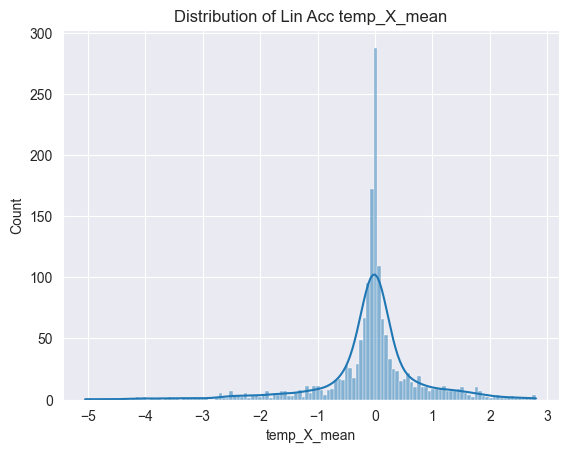

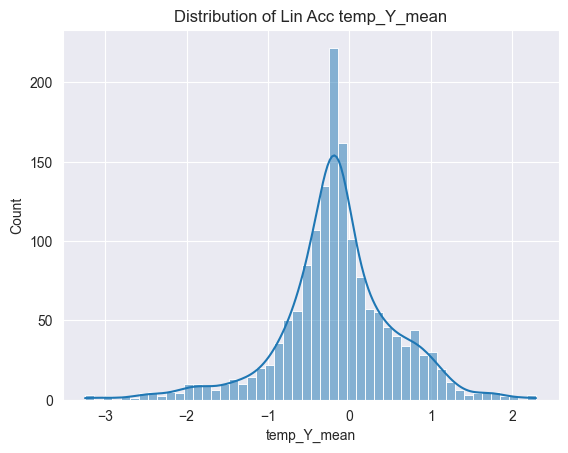

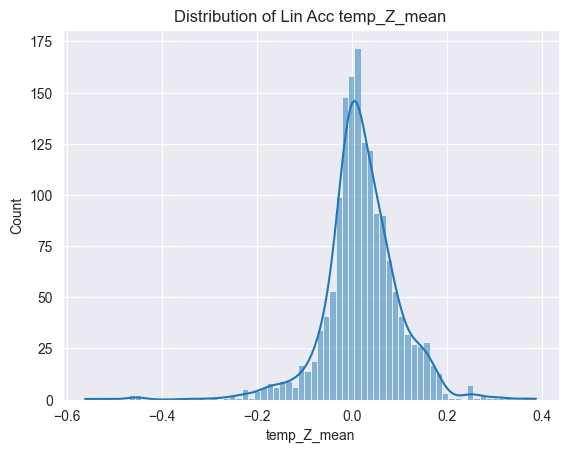

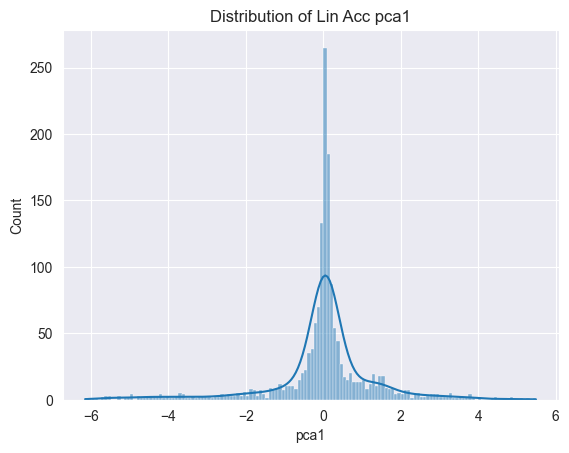

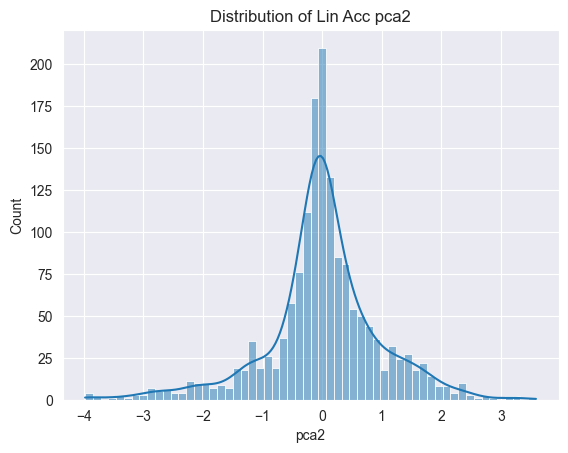

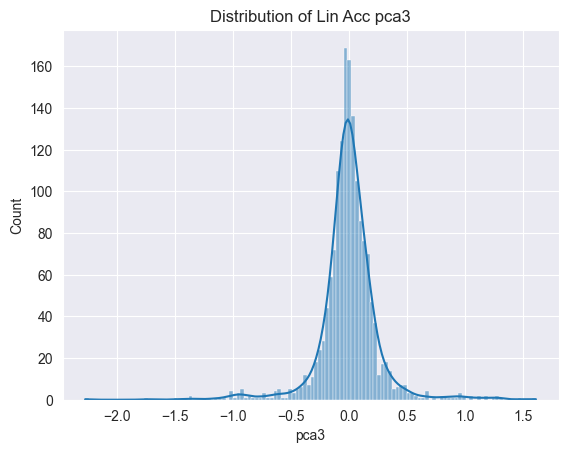

In [7]:
# Plot histograms for statistical features
for col in ['temp_X_mean', 'temp_Y_mean', 'temp_Z_mean']:
    sns.histplot(df_lin_acc_pca_time_freq[col], kde=True)
    plt.title(f'Distribution of Lin Acc {col}')
    plt.show()

# Plot histograms for PCA features
for col in pca_columns:
    sns.histplot(df_lin_acc_pca_time_freq[col], kde=True)
    plt.title(f'Distribution of Lin Acc {col}')
    plt.show()


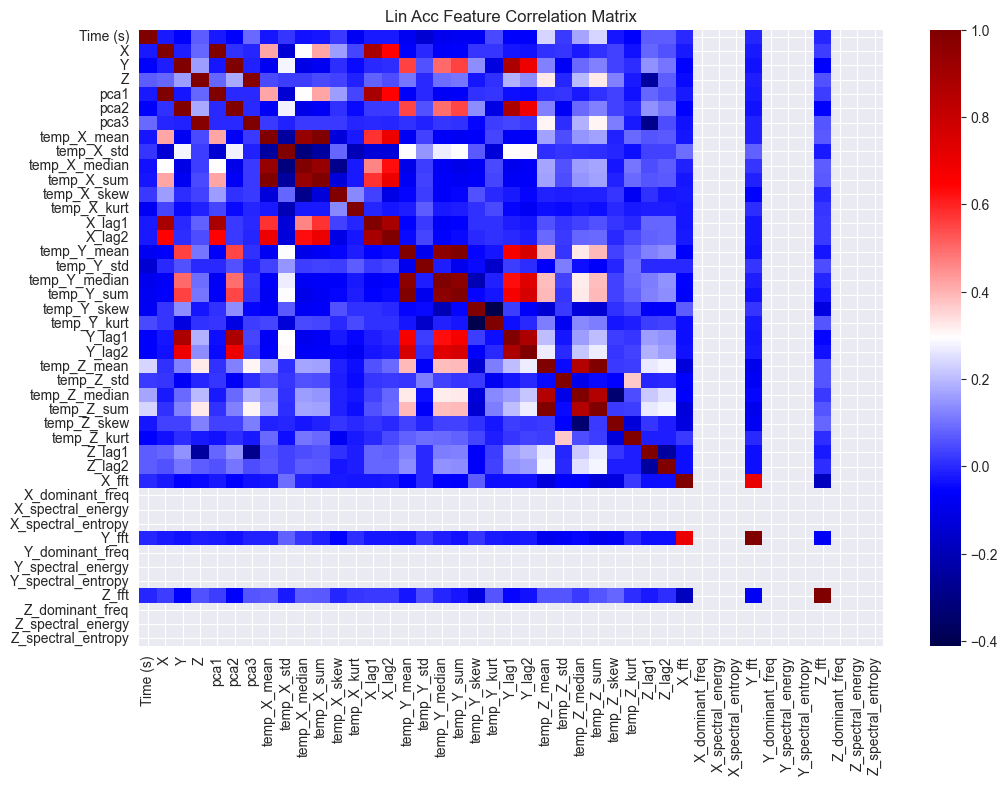

In [8]:
corr_matrix = df_lin_acc_pca_time_freq.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='seismic')
plt.title('Lin Acc Feature Correlation Matrix')
plt.show()


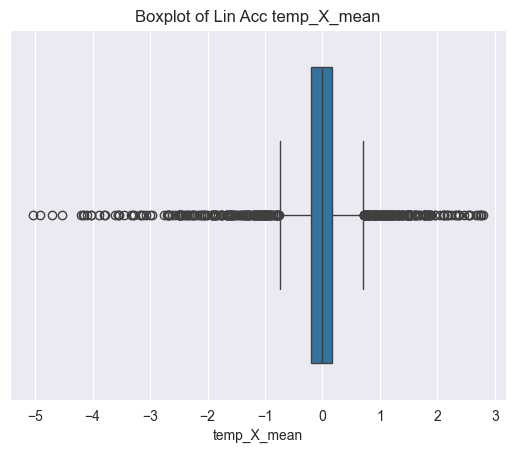

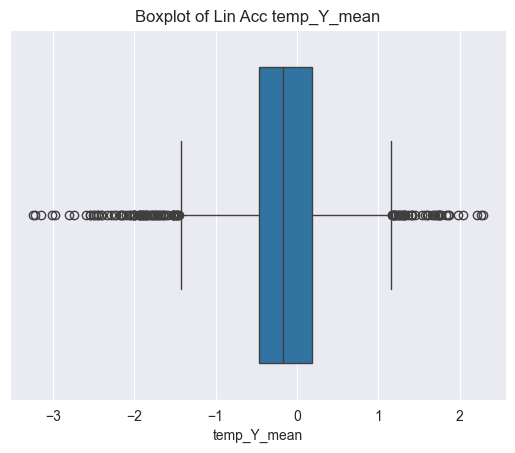

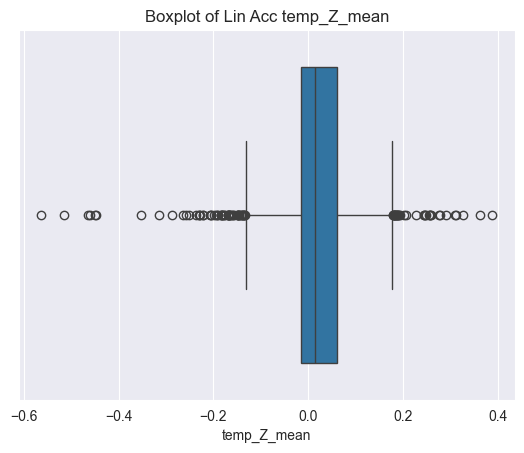

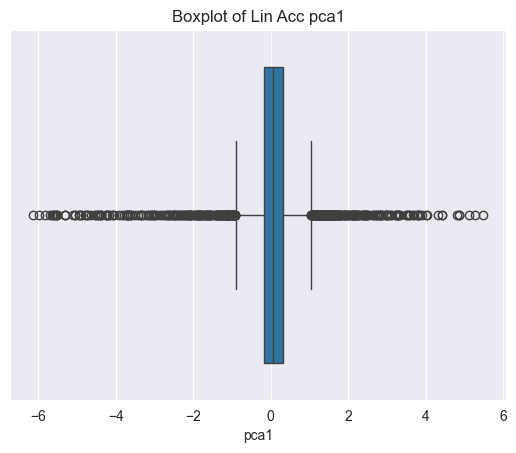

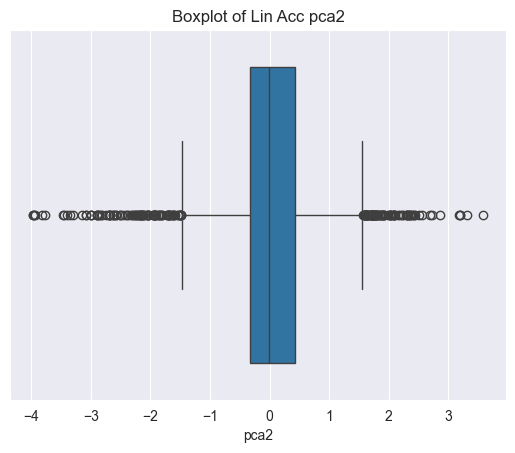

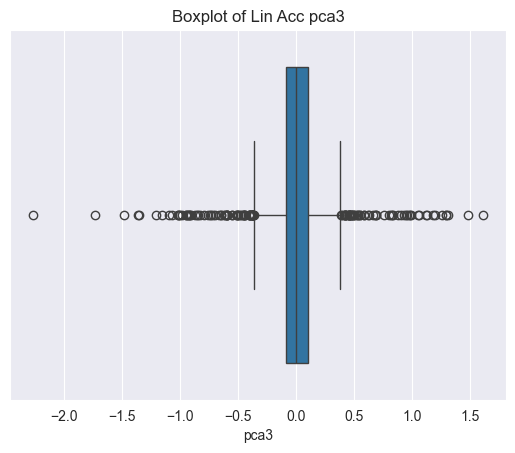

In [9]:
# Boxplots for statistical features
for col in ['temp_X_mean', 'temp_Y_mean', 'temp_Z_mean']:
    sns.boxplot(x=df_lin_acc_pca_time_freq[col])
    plt.title(f'Boxplot of Lin Acc {col}')
    plt.show()

# Boxplots for PCA features
for col in pca_columns:
    sns.boxplot(x=df_lin_acc_pca_time_freq[col])
    plt.title(f'Boxplot of Lin Acc {col}')
    plt.show()


<Figure size 1200x600 with 0 Axes>

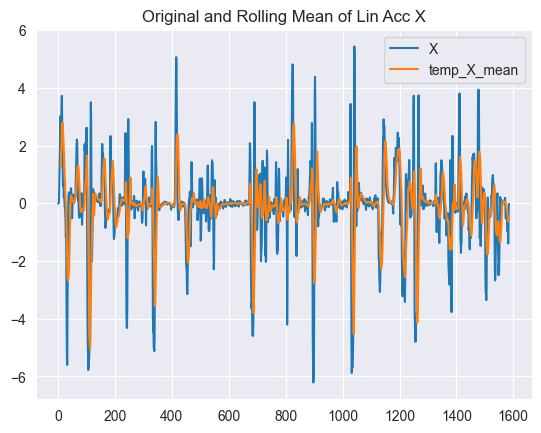

<Figure size 1200x600 with 0 Axes>

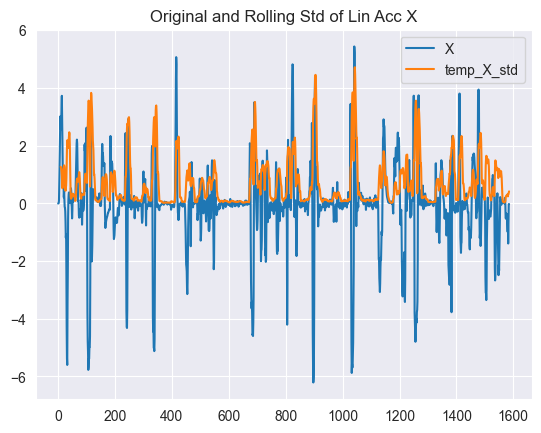

In [10]:
# Plotting time series with rolling mean
plt.figure(figsize=(12, 6))
df_lin_acc_pca_time_freq[['X', 'temp_X_mean']].plot()
plt.title('Original and Rolling Mean of Lin Acc X')
plt.show()

# Plotting time series with rolling std
plt.figure(figsize=(12, 6))
df_lin_acc_pca_time_freq[['X', 'temp_X_std']].plot()
plt.title('Original and Rolling Std of Lin Acc X')
plt.show()


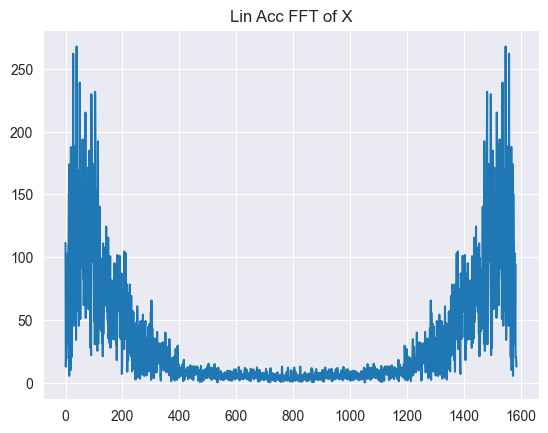

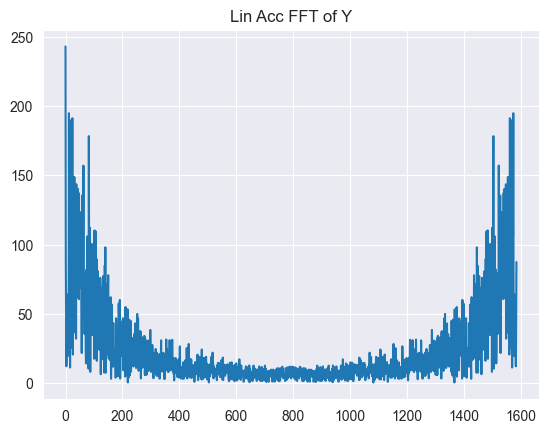

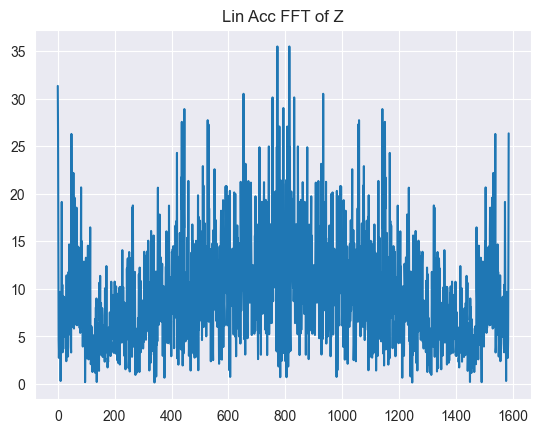

In [11]:
# Frequency domain plots
for col in ['X_fft', 'Y_fft', 'Z_fft']:
    plt.plot(df_lin_acc_pca_time_freq[col])
    plt.title(f'Lin Acc FFT of {col.split("_")[0]}')
    plt.show()


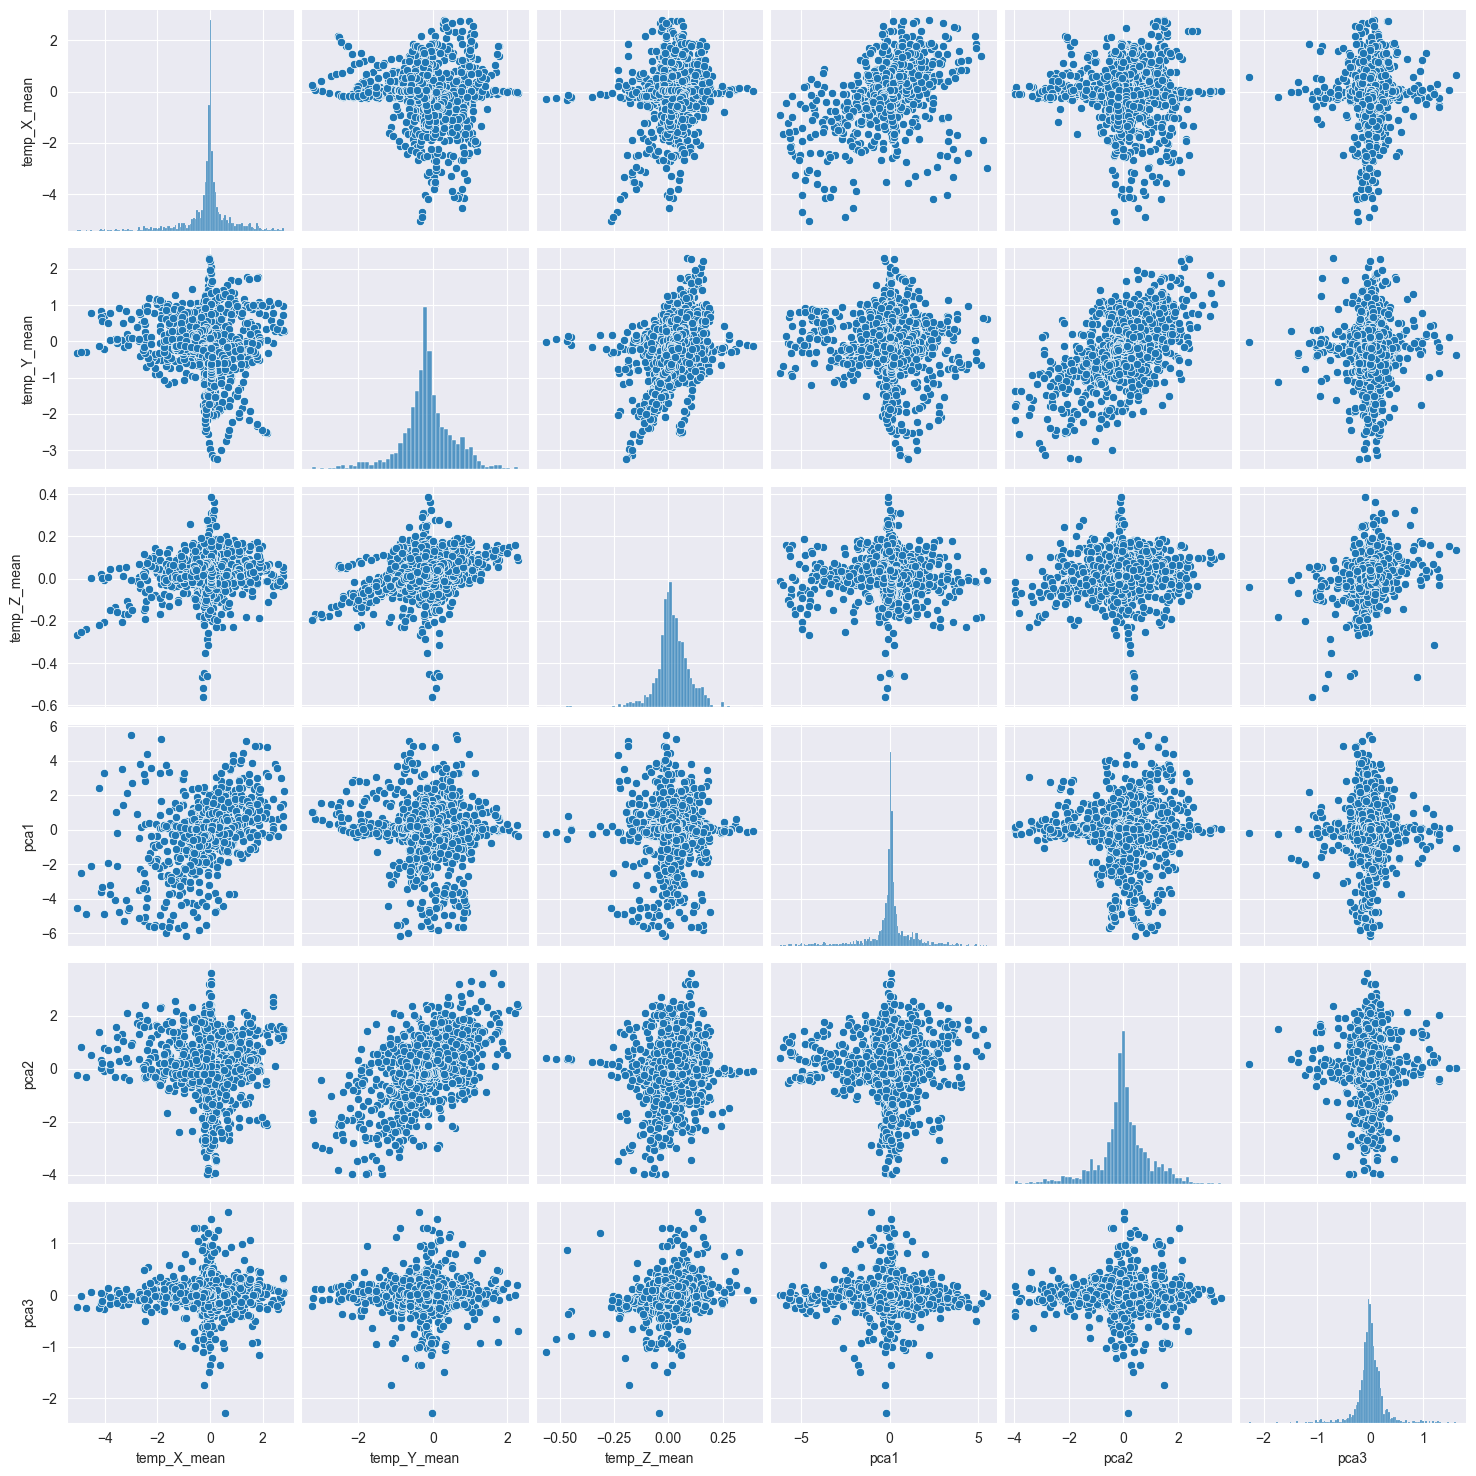

In [12]:
pair_columns = ['temp_X_mean', 'temp_Y_mean', 'temp_Z_mean'] + list(pca_columns)
sns.pairplot(df_lin_acc_pca_time_freq[pair_columns])
plt.show()


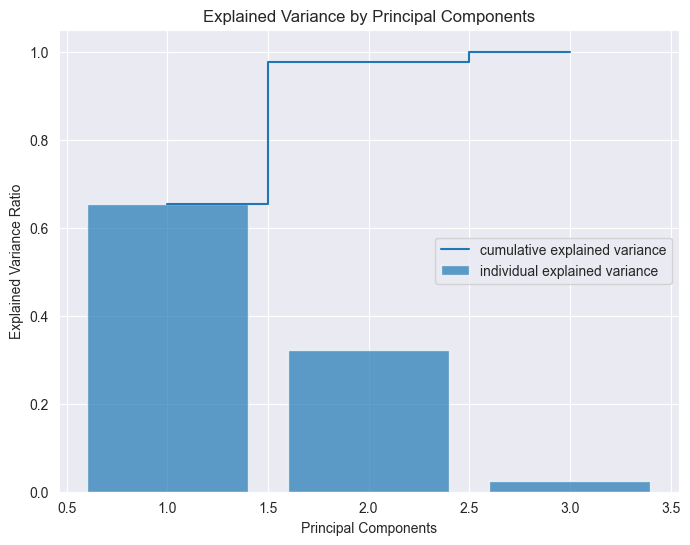

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df_lin_acc_pca_time_freq[['X', 'Y', 'Z']])
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, 4), explained_variance, alpha=0.7, align='center', label='individual explained variance')
plt.step(range(1, 4), np.cumsum(explained_variance), where='mid', label='cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()


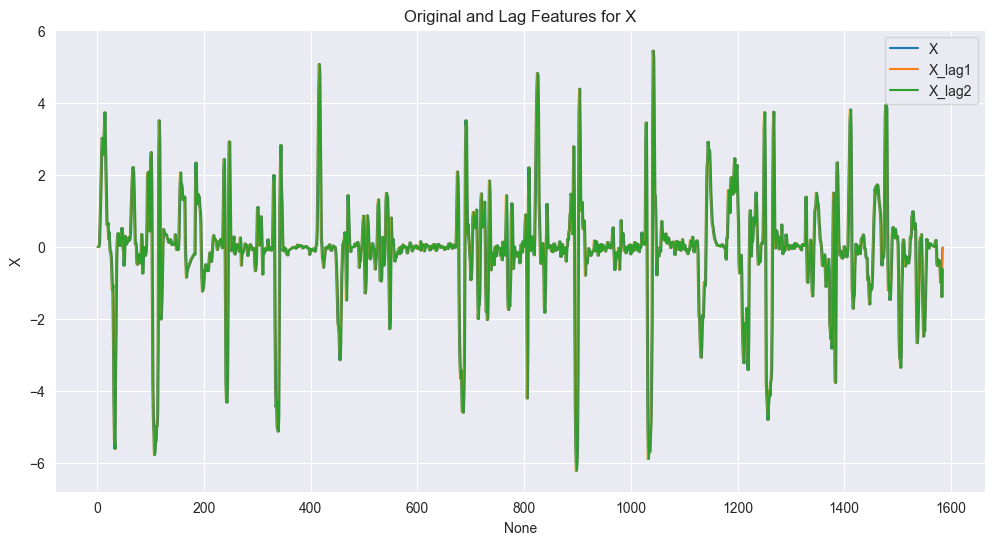

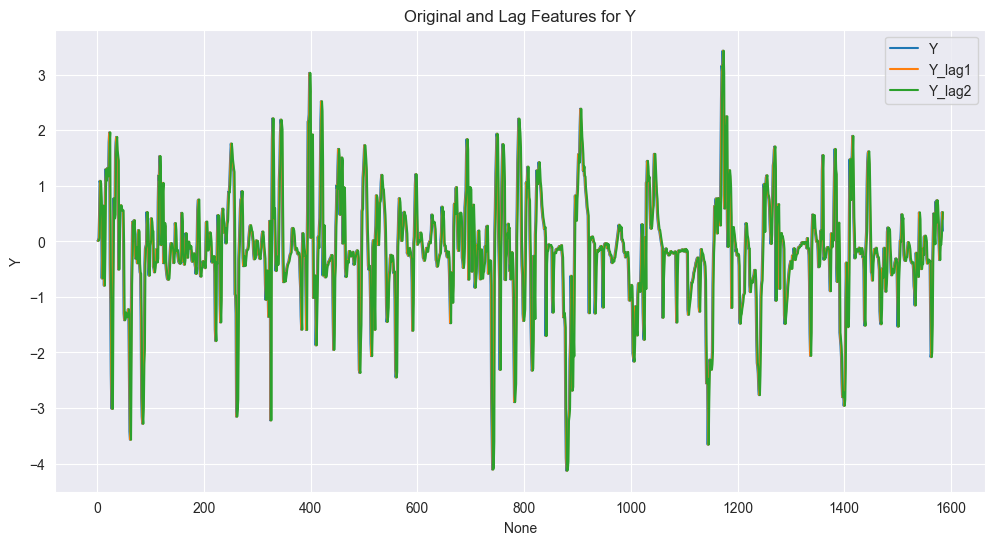

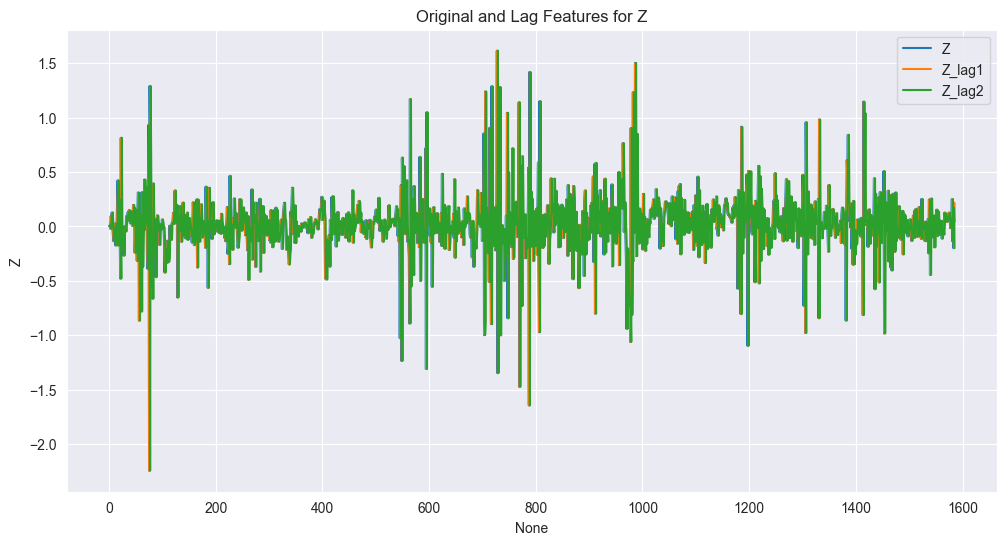

In [14]:
# Lag feature plots
for ax in ['X', 'Y', 'Z']:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_lin_acc_pca_time_freq, x=df_lin_acc_pca_time_freq.index, y=ax, label=ax)
    sns.lineplot(data=df_lin_acc_pca_time_freq, x=df_lin_acc_pca_time_freq.index, y=f'{ax}_lag1', label=f'{ax}_lag1')
    sns.lineplot(data=df_lin_acc_pca_time_freq, x=df_lin_acc_pca_time_freq.index, y=f'{ax}_lag2', label=f'{ax}_lag2')
    plt.title(f'Original and Lag Features for {ax}')
    plt.legend()
    plt.show()
